

---


# **Clustering Case Study on Wine Dataset**


---




In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_wine
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

# Load the Wine Dataset from sklearn
dataset = load_wine()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [3]:
# Display the first few rows of the dataset
print(df.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

In [4]:
# Display the last few rows of the dataset
print(df.tail())

     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
173        0.61                  0.52             1.06              7.7  0.64   
174        0.75                  0.43             1.41              7.3  0.70   
175        0.69                  0.43             1.35             10.2  0.59   
176        0.68                  0.53             1.46              9.3  0.60   
177        0.76                  0.56             1.35              9.2  0.61   

     od280/od315_of_diluted_wines  pro



---


## **K-Means Clustering**

---



In [5]:
# Determine the optimal number of clusters using the Elbow Method
distortion = []
k = range(1, 10)

In [6]:
for i in k:
    kmeans_model = KMeans(n_clusters=i, max_iter=25)
    kmeans_model.fit(df)
    distortion.append(kmeans_model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

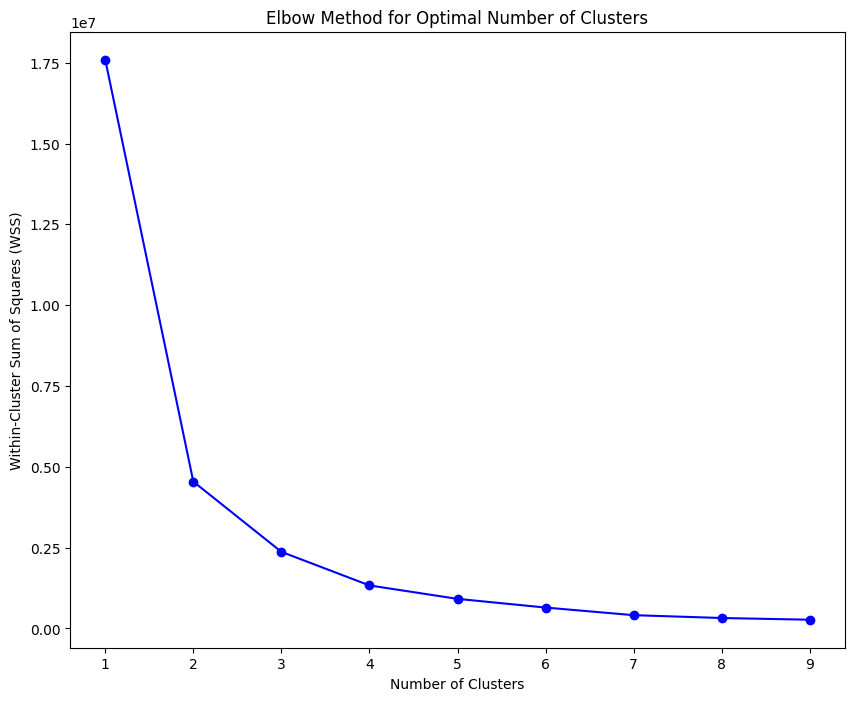

In [8]:
# Plotting the Elbow Graph
plt.figure(figsize=(10, 8))
plt.plot(k, distortion, 'bo-')
plt.xlabel("Number of Clusters")
plt.ylabel('Within-Cluster Sum of Squares (WSS)')
plt.title("Elbow Method for Optimal Number of Clusters")
plt.show()

In [9]:
# Final K-Means Model with the chosen number of clusters
kmeans_final = KMeans(n_clusters=3, max_iter=25)
kmeans_final.fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(max_iter=25, n_clusters=3)

In [10]:
# Display the cluster centroids
print("Cluster Centers:\n", kmeans_final.cluster_centers_)

Cluster Centers:
 [[1.38044681e+01 1.88340426e+00 2.42617021e+00 1.70234043e+01
  1.05510638e+02 2.86723404e+00 3.01425532e+00 2.85319149e-01
  1.91042553e+00 5.70255319e+00 1.07829787e+00 3.11404255e+00
  1.19514894e+03]
 [1.29298387e+01 2.50403226e+00 2.40806452e+00 1.98903226e+01
  1.03596774e+02 2.11112903e+00 1.58403226e+00 3.88387097e-01
  1.50338710e+00 5.65032258e+00 8.83967742e-01 2.36548387e+00
  7.28338710e+02]
 [1.25166667e+01 2.49420290e+00 2.28855072e+00 2.08231884e+01
  9.23478261e+01 2.07072464e+00 1.75840580e+00 3.90144928e-01
  1.45188406e+00 4.08695651e+00 9.41159420e-01 2.49072464e+00
  4.58231884e+02]]


In [11]:
# Display the cluster labels for each data point
print("Cluster Labels:\n", kmeans_final.labels_)

Cluster Labels:
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1
 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 2 2 1 2 2 1 1 1 2 2 0
 1 2 2 2 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 2 2 1 1 2 1 2 1 2 2 2 1 2 2 2 2 1 2
 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 2 1 1 1 1 2 2 2 1 1 2 2 1 1 2 1
 1 2 2 2 2 1 1 1 2 1 1 1 2 1 2 1 1 2 1 1 1 1 2 2 1 1 1 1 1 2]


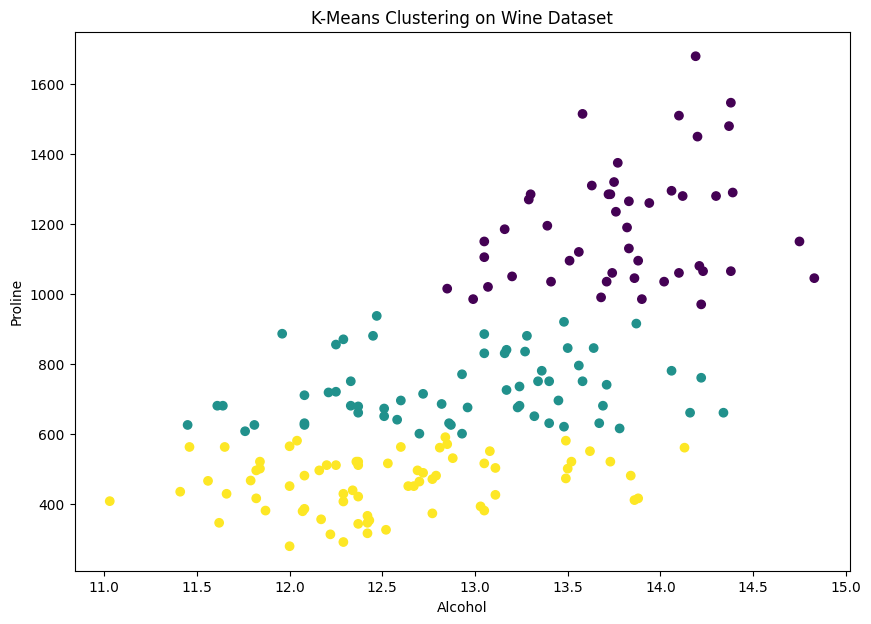

In [12]:
# Visualize the clusters
plt.figure(figsize=(10, 7))
plt.scatter(df['alcohol'], df['proline'], c=kmeans_final.labels_, cmap='viridis')
plt.xlabel('Alcohol')
plt.ylabel('Proline')
plt.title('K-Means Clustering on Wine Dataset')
plt.show()

In [13]:
# Adding the K-Means cluster output to the DataFrame
df['kmeans_output'] = kmeans_final.labels_

In [14]:
# Compare with the actual classes
df['classes'] = dataset.target

In [15]:
# Displaying the K-Means output and actual classes
print(df[['kmeans_output', 'classes']].head(10))

   kmeans_output  classes
0              0        0
1              0        0
2              0        0
3              0        0
4              1        0
5              0        0
6              0        0
7              0        0
8              0        0
9              0        0




---


## **Hierarchical Clustering**


---



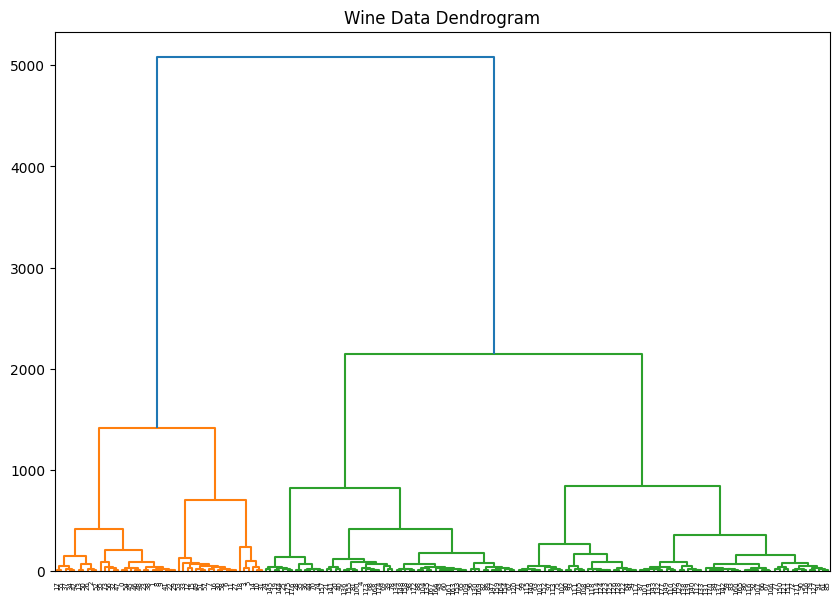

In [16]:
# Data Visualization - Dendrogram
plt.figure(figsize=(10, 7))
plt.title("Wine Data Dendrogram")
dend = shc.dendrogram(shc.linkage(df.iloc[:, :-2], method='ward'))
plt.show()

In [17]:
# Applying Agglomerative Clustering
cluster_model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster_model.fit(df.iloc[:, :-2])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', n_clusters=3)

In [18]:
# Display the cluster labels from Hierarchical Clustering
print("Hierarchical Clustering Labels:\n", cluster_model.labels_)

Hierarchical Clustering Labels:
 [0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 2 2 0 0 2 0 0 0 0 0 0 2 2
 0 0 2 2 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 1 1 2 1 1 2 2 2 1 1 0
 2 1 1 1 2 1 1 2 2 1 1 1 1 1 2 2 1 1 1 1 1 0 2 1 2 1 2 1 1 1 2 1 1 1 1 2 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 2 1 1 1 1 2 1 1 2 2 1 2
 2 1 1 1 1 2 2 2 1 2 2 2 1 2 1 2 2 1 2 2 2 2 1 1 2 2 2 2 2 1]


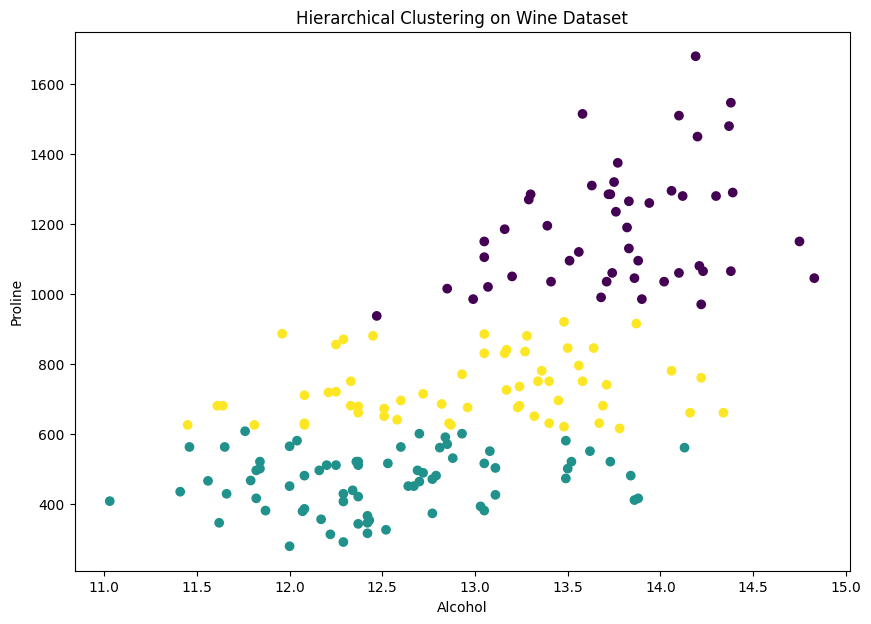

In [19]:
# Visualize the Hierarchical Clustering results
plt.figure(figsize=(10, 7))
plt.scatter(df['alcohol'], df['proline'], c=cluster_model.labels_, cmap='viridis')
plt.xlabel('Alcohol')
plt.ylabel('Proline')
plt.title('Hierarchical Clustering on Wine Dataset')
plt.show()



---


## **Conclusion:**


---


In this analysis, we applied both K-Means and Hierarchical Clustering techniques to the Wine dataset to group similar types of wines. After comparing the results, we found that Hierarchical Clustering provided clearer and more distinct clusters compared to K-Means.

This suggests that Hierarchical Clustering is better suited for this particular dataset, as it effectively captures the natural groupings of the data.

Overall, Hierarchical Clustering allowed us to identify more meaningful patterns in the wine characteristics, making it the more appropriate method for this case.


---

